# Chapter 5 - Clustering

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy.random as rnd
import scipy.stats as st
import scipy.cluster.hierarchy as hac
import scipy.cluster.vq as vq

In [18]:
import os
plt.style.use(os.path.join(os.getcwd(), 'mystyle.mplstyle') )
#plt.rcParams['font.size'] = 20

## John Snow on Cholera in London

In [19]:
deaths = pd.read_csv('data/cholera_deaths.txt')
pumps = pd.read_csv('data/cholera_pumps.txt')

In [20]:
deaths.head()

,X,Y
0,13.588010,11.095600
1,9.878124,12.559180
2,14.653980,10.180440
3,15.220570,9.993003
4,13.162650,12.963190


In [21]:
pumps.head()

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


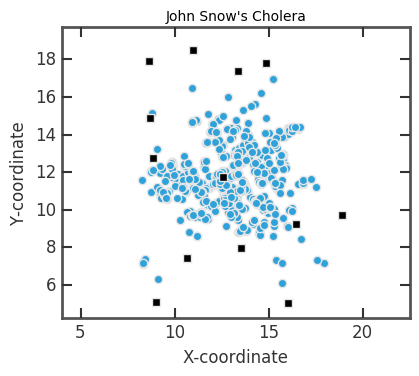

In [22]:
plt.figure(figsize=(4,3.5))
plt.plot(deaths['X'], deaths['Y'], 
         marker='o', lw=0, mew=1, mec='0.9', ms=6)
plt.plot(pumps['X'], pumps['Y'], 
         marker='s', lw=0, mew=1, mec='0.9', color='k', ms=6)
plt.axis('equal')
plt.xlim((4.0,22.5));
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow\'s Cholera');

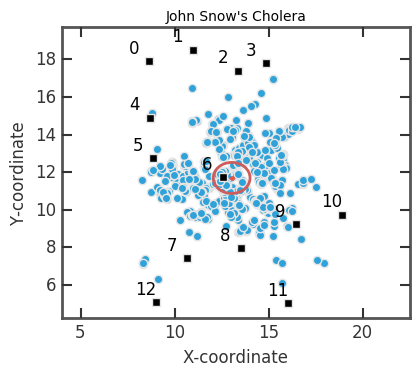

In [23]:
from matplotlib.patches import Ellipse
fig = plt.figure(figsize=(4,3.5))
ax = fig.add_subplot(111)
plt.plot(deaths['X'], deaths['Y'], 
         marker='o', lw=0, mew=1, mec='0.9', ms=6)
plt.plot(pumps['X'], pumps['Y'], 
         marker='s', lw=0, mew=1, mec='0.9', color='k', ms=6)

ellipse = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), 
                width=deaths['X'].std(), height=deaths['Y'].std(),
                zorder=32, fc='None', ec='IndianRed', lw=2)
ax.add_artist(ellipse)
plt.plot(deaths['X'].mean(), deaths['Y'].mean(), 
         '.', ms=6, mec='IndianRed', zorder=32)
for i in pumps.index:
    plt.annotate(s='{0}'.format(i), 
                 xy=(pumps[['X','Y']].loc[i]), 
                 xytext=(-15,6), textcoords='offset points')
plt.axis('equal')
plt.xlim((4.0,22.5));
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow\'s Cholera');

In [24]:
pumps[['X','Y']].loc[0]

X     8.651201
Y    17.891600
Name: 0, dtype: float64

In [25]:
deaths_tmp = deaths[['X','Y']].as_matrix()
idx_arr = np.array([], dtype='int')
for i in range(len(deaths)):
    idx_arr = np.append(idx_arr, 
                        (pumps.subtract(deaths_tmp[i])).apply(lambda x:x**2).sum(axis=1).apply(lambda x:x**0.5).idxmin() )
deaths['C'] = idx_arr

In [26]:
deaths.head()

,X,Y,C
0,13.588010,11.095600,6
1,9.878124,12.559180,5
2,14.653980,10.180440,9
3,15.220570,9.993003,9
4,13.162650,12.963190,6


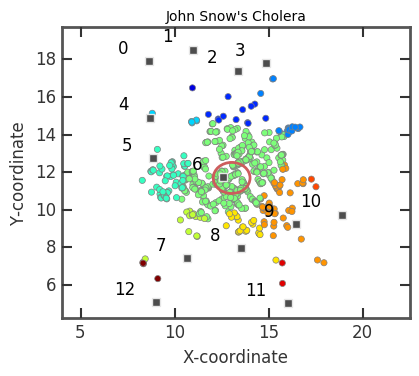

In [27]:
fig = plt.figure(figsize=(4,3.5))
ax = fig.add_subplot(111)
np.unique(deaths['C'].values)
plt.scatter(deaths['X'].as_matrix(), deaths['Y'].as_matrix(), 
            color=plt.cm.jet(deaths['C']/12.), 
            marker='o', lw=0.5, edgecolors='0.5', s=20)
plt.plot(pumps['X'],pumps['Y'], 
         marker='s', lw=0, mew=1, mec='0.9', color='0.3', ms=6)
for i in pumps.index:
    plt.annotate(s='{0}'.format(i), xy=(pumps[['X','Y']].loc[i]), 
                 xytext=(-15,6), textcoords='offset points', ha='right')
ellipse = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), 
                width=deaths['X'].std(), height=deaths['Y'].std(),
                zorder=32, fc='None', ec='IndianRed', lw=2)
ax.add_artist(ellipse)
plt.axis('equal')
plt.xlim((4.0,22.5))
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow\'s Cholera')

# K-means clustering

## Suicide rate vs. GDP vs. absolute Latitude

In [28]:
TABLE_FILE = 'data/data_ch4.h5'
d2 = pd.read_hdf(TABLE_FILE)
d2 = d2.dropna()

In [29]:
rates = d2[['DFE','GDP_CD','Both']].as_matrix().astype('float')

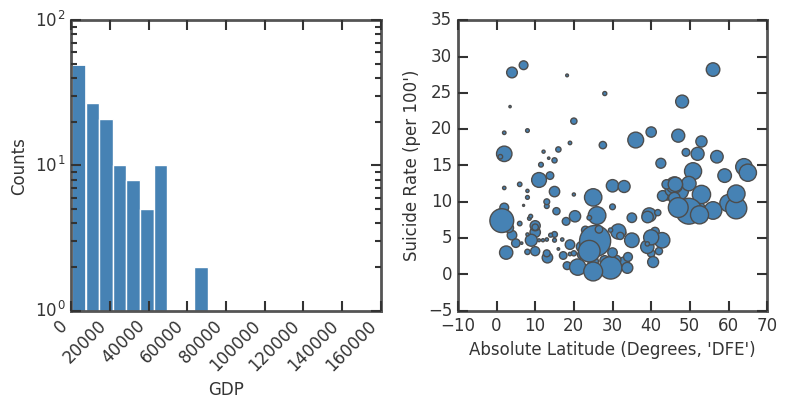

In [30]:
plt.subplots(12, figsize=(8,3.5))
plt.subplot(121)
plt.hist(rates.T[1], bins=20,color='SteelBlue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('Counts')

plt.subplot(122)
plt.scatter(rates.T[0], rates.T[2], s=5e2*rates.T[1]/rates.T[1].max(),
           color='SteelBlue', edgecolors='0.3');
plt.xlabel('Absolute Latitude (Degrees, \'DFE\')')
plt.ylabel('Suicide Rate (per 100\')')
plt.subplots_adjust(wspace=0.25);

In [31]:
w = vq.whiten(rates)

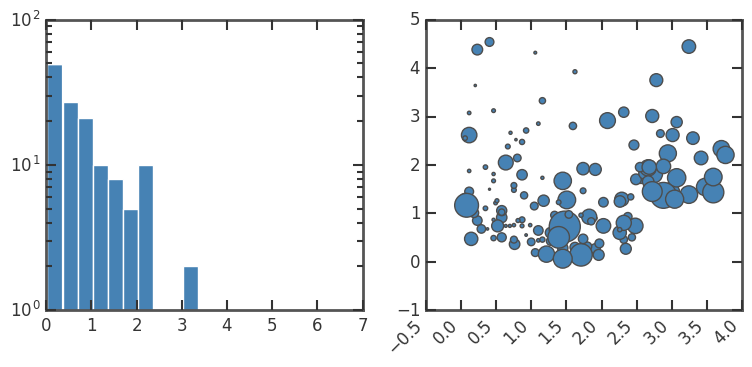

In [33]:
plt.subplots(12, figsize=(8,3.5))
plt.subplot(121)
plt.hist(w[:,1], bins=20, color='SteelBlue')
plt.yscale('log')
plt.subplot(122)
plt.scatter(w.T[0], w.T[2], s=5e2*w.T[1]/w.T[1].max(), 
            color='SteelBlue', edgecolors='0.3')
plt.xticks(rotation=45, ha='right');

In [34]:
#z1_cb, di = vq.kmeans(w, 2, iter=100)

In [35]:
init_guess = np.array([[20,20E3,10],[45,100E3,15]])
sc = rates.std(axis=0)
init_guess /= sc

z2_cb, z2_lbl = vq.kmeans2(w, init_guess, minit='matrix', iter=500)

In [36]:
z2_cb_sc = z2_cb * sc


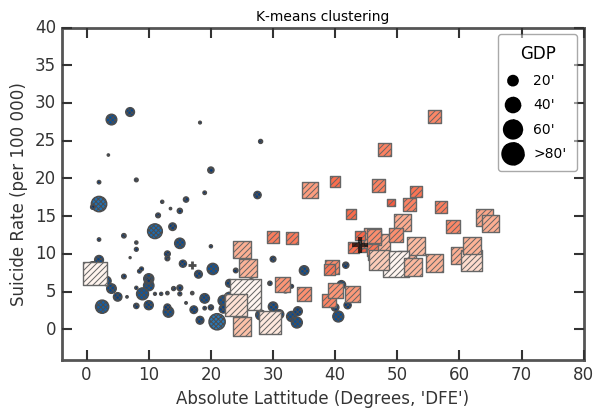

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(z2_cb_sc[0,0], z2_cb_sc[0,2], 
            s=5e2*z2_cb_sc[0,1]/rates.T[1].max(), 
            marker='+', color='k', edgecolors='k', 
            lw=2, zorder=10, alpha=0.7);
plt.scatter(z2_cb_sc[1,0], z2_cb_sc[1,2], 
            s=5e2*z2_cb_sc[1,1]/rates.T[1].max(), 
            marker='+', color='k', edgecolors='k', 
            lw=3, zorder=10, alpha=0.7);

s0 = abs(z2_lbl==0).astype('bool')
s1 = abs(z2_lbl==1).astype('bool')
pattern1 = 5*'x'
pattern2 = 4*'/'
plt.scatter(w.T[0][s0]*sc[0], 
            w.T[2][s0]*sc[2], 
            s=5e2*rates.T[1][s0]/rates.T[1].max(),
            lw=1,
            hatch=pattern1,
            edgecolors='0.3',
            color=plt.cm.Blues_r(
                rates.T[1][s0]/rates.T[1].max()));
plt.scatter(rates.T[0][s1],
            rates.T[2][s1], 
            s=5e2*rates.T[1][s1]/rates.T[1].max(),
            lw=1,
            hatch=pattern2,
            edgecolors='0.4',
            marker='s',
            color=plt.cm.Reds_r(
                rates.T[1][s1]/rates.T[1].max()+0.4))

#for i in range(len(rates.T[0][s0])):
#    plt.plot([z2_cb_sc[0,0], rates.T[0][s0][i]],
#             [z2_cb_sc[0,2], rates.T[2][s0][i]], 
#             color='SteelBlue', lw=2, alpha=0.4, 
#             zorder=-1)
#for i in range(len(rates.T[0][s1])):
#    plt.plot([z2_cb_sc[1,0], rates.T[0][s1][i]],
#             [z2_cb_sc[1,2], rates.T[2][s1][i]], 
#             color='IndianRed', lw=2, alpha=0.4, 
#             zorder=-1)

# create some *empty* patches to use for legend, 
p1 = plt.scatter([],[], hatch='None', 
                 s=20E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)
p2 = plt.scatter([],[], hatch='None',
                 s=40E3*5e2/rates.T[1].max(),  
                 color='k', edgecolors='None',)
p3 = plt.scatter([],[], hatch='None',
                 s=60E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)
p4 = plt.scatter([],[], hatch='None',
                 s=80E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)

labels = ["20\'", "40\'", "60\'", ">80\'"]

plt.legend([p1, p2, p3, p4], labels, ncol=1, 
           frameon=True, handlelength=1, 
           loc=1, borderpad=0.75,labelspacing=0.75,
           handletextpad=0.75, title='GDP', scatterpoints=1.5)
plt.ylim((-4,40))
plt.xlim((-4,80))
plt.title('K-means clustering')
plt.xlabel('Absolute Lattitude (Degrees, \'DFE\')')
plt.ylabel('Suicide Rate (per 100 000)');

## Identifying clusters of stars/galaxies through their colors/positions.


In [38]:
import astropy.coordinates as coord
import astropy.units as u
import astropy.constants as c

In [39]:
#ataset = np.loadtxt('data/zg_ori/zg_ori')
#f = pd.read_csv('data/zg_ori/zg_ori')
uzcat = pd.read_table('data/uzcJ2000.tab/uzcJ2000.tab', 
                   sep='\t', 
                   header=16, 
                   dtype='str',
                   names=['ra', 'dec', 'Zmag', 'cz', 'cze', 'T', 'U', 'Ne',
                           'Zname', 'C', 'Ref', 'Oname', 'M', 'N'],
                   skiprows=[17])

In [40]:
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,000237.9,+163838,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,000246.3,+185310,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,000257.0,+041231,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,000302.9,+185221,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,000305.6,-015450,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [41]:
uzcat['ra'] = uzcat['ra'].apply(lambda x: '{0}h{1}m{2}s'.format(x[:2],x[2:4],x[4:]))
uzcat['dec'] = uzcat['dec'].apply(lambda x: '{0}d{1}m{2}s'.format(x[:3],x[3:5],x[5:]))

Here we just parse the coordinate string into the above mentioned units of hours or degrees, with minutes and seconds.

In [42]:
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,00h02m37.9s,+16d38m38s,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,00h02m46.3s,+18d53m10s,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,00h02m57.0s,+04d12m31s,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,00h03m02.9s,+18d52m21s,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,00h03m05.6s,-01d54m50s,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [43]:
uzcat = uzcat.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
uzcat['cz'] = uzcat['cz'].astype('float')

In [44]:
coords_uzc = coord.SkyCoord(uzcat['ra'], uzcat['dec'], frame='fk5', equinox='J2000')

In [45]:
coords_uzc.ra.deg.min()

0.0070833333333333321

In [46]:
color_czs = (uzcat['cz']+abs(uzcat['cz'].min())) / (uzcat['cz'].max()+abs(uzcat['cz'].min()))

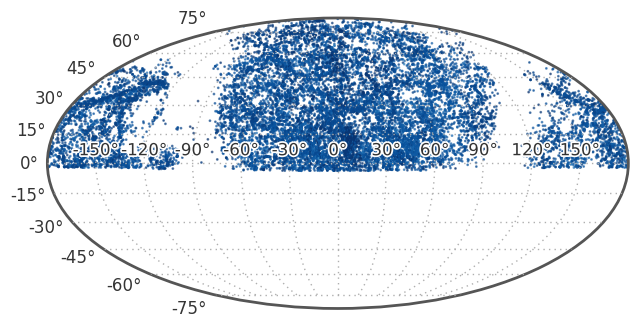

In [47]:
from matplotlib.patheffects import withStroke
whitebg = withStroke(foreground="w", linewidth=2.5)
fig = plt.figure(figsize=(8,3.5))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords_uzc.ra.radian-np.pi, coords_uzc.dec.radian, 
           color=plt.cm.Blues_r(color_czs), alpha=0.6,
           s=4, marker='.', zorder=-1)
plt.grid()
for tick in ax.get_xticklabels():
    tick.set_path_effects([whitebg])

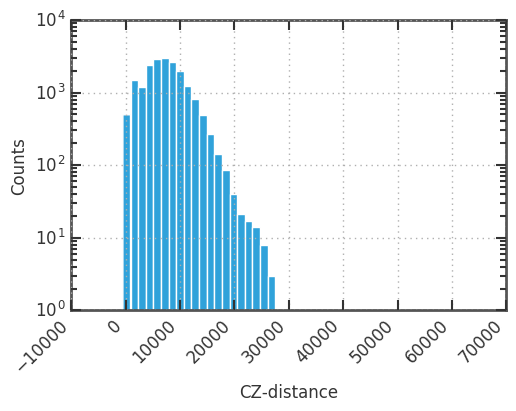

In [48]:
uzcat['cz'].hist(bins=50)
plt.yscale('log')
plt.xlabel('CZ-distance')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right');

# Visualizing the data


In [49]:
uzc_czs = uzcat['cz'].as_matrix()
uzcat['Zmag'] = uzcat['Zmag'].astype('float')
decmin = 15
decmax = 30
ramin = 90
ramax = 295
czmin = 0
czmax = 12500
selection_dec = (coords_uzc.dec.deg>decmin) * (coords_uzc.dec.deg<decmax)
selection_ra = (coords_uzc.ra.deg>ramin) * (coords_uzc.ra.deg<ramax)
selection_czs = (uzc_czs>czmin) * (uzc_czs<czmax)
selection= selection_dec * selection_ra * selection_czs

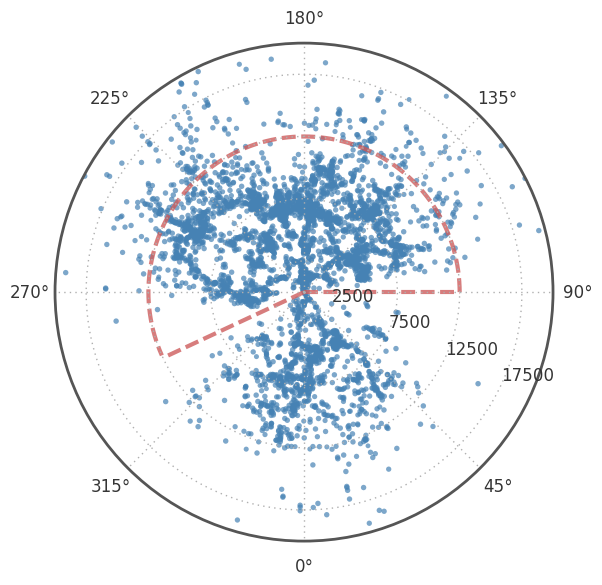

In [50]:
fig = plt.figure( figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(coords_uzc.ra.radian[selection_dec], uzc_czs[selection_dec], 
                     color='SteelBlue',
                     #color=plt.cm.RdBu((coords_uzc.dec.deg[selection])/100.), 
                     s=uzcat['Zmag'][selection_dec*selection_czs], 
                     edgecolors="none", 
                     alpha=0.7,
                    zorder=0)
ax.set_rlim(0,20000)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,20001,5000));
ax.plot([(ramin*u.deg).to(u.radian).value, 
         (ramin*u.deg).to(u.radian).value], [0,12500], 
        color='IndianRed', alpha=0.8, dashes=(10,4))
ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500],
        color='IndianRed', alpha=0.8, dashes=(10,4))
theta = np.arange(ramin, ramax, 1)
ax.plot(theta*np.pi/180., np.ones_like(theta)*12500,
        color='IndianRed', alpha=0.8, dashes=(10,4));

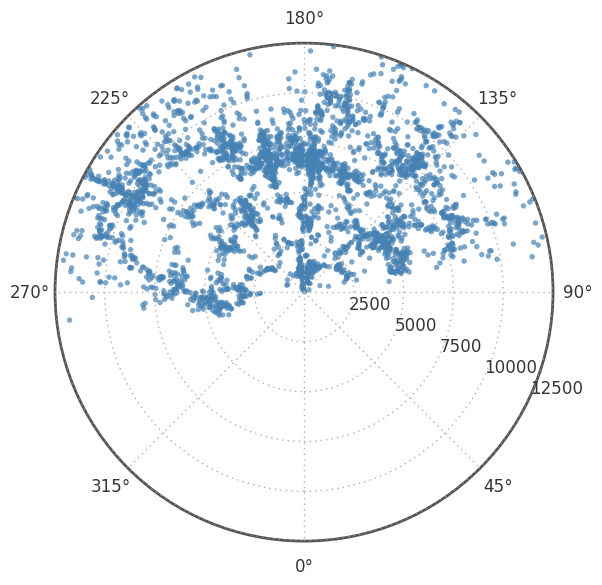

In [51]:
fig = plt.figure( figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(coords_uzc.ra.radian[selection], uzc_czs[selection], 
            color='SteelBlue',
            s=uzcat['Zmag'].as_matrix().astype('float')[selection], 
            edgecolors="none", 
            alpha=0.7,
            zorder=0)
ax.set_rlim(0,12500)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,12501,2500));

In [52]:
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,00h02m37.9s,+16d38m38s,14.9,6350,19,A,1,0,000000+16220,F,NaN,I5378S,NaN,NaN
1,00h02m46.3s,+18d53m10s,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,NaN,NaN
2,00h02m57.0s,+04d12m31s,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,NaN,NaN
3,00h03m02.9s,+18d52m21s,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,NaN,NaN
4,00h03m05.6s,-01d54m50s,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,NaN,NaN


In [53]:
mycat = uzcat.copy(deep=True).loc[selection]
mycat['ra_deg'] = coords_uzc.ra.deg[selection]
mycat['dec_deg'] = coords_uzc.dec.deg[selection]

In [54]:
mycat.Zmag = mycat.Zmag.astype('float')
mycat.Zmag.head()

3201    15.4
3221    15.5
3231    15.4
3249    15.4
3254    15.3
Name: Zmag, dtype: float64

In [55]:
zs = (((mycat['cz'].as_matrix()*u.km/u.s) / c.c).decompose())
dist = coord.Distance(z=zs)
print(dist)
mycat['dist'] = dist

[  62.79998101  172.23410971  145.40065934 ...,   64.30473839   61.81198342
   57.46582197] Mpc


In [56]:
mycat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N,ra_deg,dec_deg,dist
3201,06h28m30.7s,+21d33m01s,15.4,4305,71,A,1,0,062536+21350,Z,2766,06256+2135,NaN,NaN,97.127917,21.550278,62.799981
3221,06h35m10.7s,+26d27m52s,15.5,11592,50,B,1,0,063206+26300,Z,2766,06321+2630,NaN,NaN,98.794583,26.464444,172.234110
3231,06h38m37.9s,+26d30m22s,15.4,9829,57,A,1,0,063536+26320,Z,0654,06356+2632,NaN,NaN,99.657917,26.506111,145.400659
3249,06h42m14.4s,+26d03m02s,15.4,6768,51,A,1,0,063912+26050,Z,2766,06392+2605,NaN,NaN,100.560000,26.050556,99.351277
3254,06h43m17.8s,+21d00m21s,15.3,5372,5,-,1,0,064018+21030,NaN,0654,06403+2103,NaN,NaN,100.824167,21.005833,78.579201


In [57]:
coords_xyz = coord.SkyCoord(ra=mycat['ra_deg']*u.deg, dec=mycat['dec_deg']*u.deg, distance=dist*u.Mpc, frame='fk5', equinox='J2000')

In [58]:
mycat['X'] = coords_xyz.cartesian.x.value
mycat['Y'] = coords_xyz.cartesian.y.value
mycat['Z'] = coords_xyz.cartesian.z.value

In [59]:
mycat[['X','Y','Z','ra_deg', 'dec_deg', 'dist']].head()

,X,Y,Z,ra_deg,dec_deg,dist
3201,-7.247801,57.958570,23.067534,97.127917,21.550278,62.799981
3221,-23.573851,152.373096,76.754816,98.794583,26.464444,172.234110
3231,-21.829144,128.272970,64.891335,99.657917,26.506111,145.400659
3249,-16.357852,87.746159,43.631508,100.560000,26.050556,99.351277
3254,-13.776149,72.051976,28.167736,100.824167,21.005833,78.579201


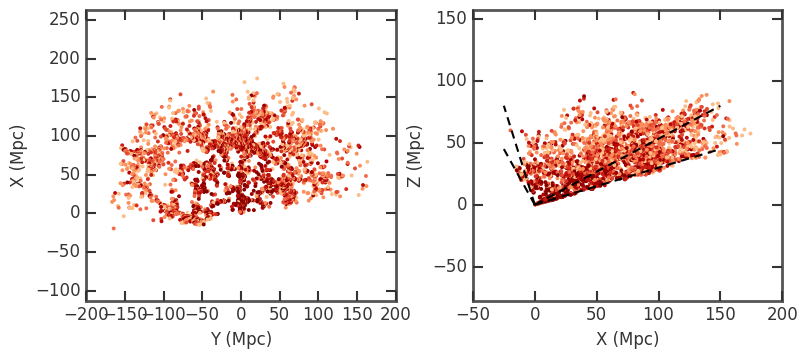

In [60]:
fig, axs = plt.subplots(1,2, figsize=(8,3.5))

plt.subplot(121)
plt.scatter(mycat['Y'], -1*mycat['X'], s=8, color=plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max()) ), edgecolor='None')
plt.xlabel('Y (Mpc)'); plt.ylabel('X (Mpc)')
plt.axis('equal');

#plt.figure(figsize=(7,6))
plt.subplot(122)
plt.scatter(-1*mycat['X'],mycat['Z'], 
            s=8, color=plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max()) ), edgecolor='None')
lstyle = dict(lw=1.5, color='k', dashes=(6,4))
plt.plot([0,150], [0,80], **lstyle)
plt.plot([0,150], [0,45], **lstyle)
plt.plot([0,-25], [0,80], **lstyle)
plt.plot([0,-25], [0,45], **lstyle)
plt.xlabel('X (Mpc)'); plt.ylabel('Z (Mpc)')
plt.axis('equal')
plt.subplots_adjust(wspace=0.25);

In [61]:
mycat.describe()

,Zmag,cz,ra_deg,dec_deg,dist,X,Y,Z
count,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000
mean,14.953974,6812.333538,186.203655,22.481214,100.299020,-64.799021,-9.490795,38.344264
std,0.697509,2781.791768,46.249371,4.362414,41.474895,37.896815,65.403842,17.557857
min,8.900000,31.000000,97.127917,15.000833,0.447238,-174.322147,-166.518595,0.177526
25%,14.800000,4792.500000,149.190208,18.505417,69.998827,-93.320989,-53.625803,26.077586
50%,15.200000,6886.000000,182.644583,22.324444,101.113686,-68.627203,-1.816361,38.189294
75%,15.400000,8881.000000,220.861667,26.526667,131.065547,-34.137557,36.506820,50.170942
max,15.700000,12482.000000,286.765417,29.999722,185.865992,19.650275,163.471919,90.443146


In [62]:
mycat.to_pickle('data/data_ch5_clustering.pick')

In [63]:
TABLE_FILE = 'data/data_ch5_clustering.h5'
mycat.to_hdf(TABLE_FILE, 'ch5data', mode='w', table=True)

C:\Users\Magnus\Anaconda3\lib\site-packages\pandas\core\generic.py:939: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['ra', 'dec', 'cze', 'T', 'U', 'Ne', 'Zname', 'C', 'Ref', 'Oname', 'M', 'N']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


### Hierarchical clustering

In [64]:
galpos = np.array([mycat.X,mycat.Y]).T

In [65]:
z_centroid = hac.linkage(galpos, metric = 'euclidean', method = 'centroid')

In [66]:
z_centroid.shape

(3258, 4)

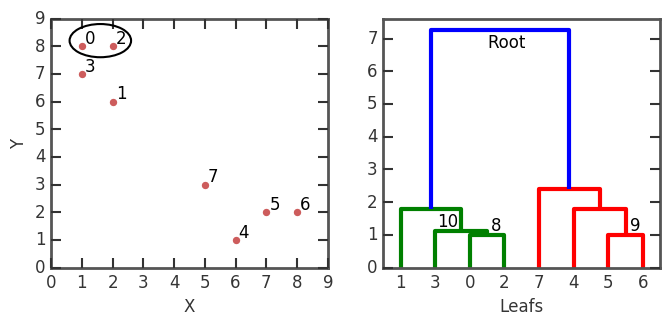

In [67]:
x = np.array([1,2,2,1,6,7,8,5])
y = np.array([8,6,8,7,1,2,2,3])
a = np.array([x,y]).T
z = hac.linkage(a, metric = 'euclidean', method = 'centroid')
fig, axs = plt.subplots(1,2,figsize=(7,3))
axs[0].scatter(x,y, marker='o', s=40, c='IndianRed')
axs[0].set_xlabel('X'); axs[0].set_ylabel('Y');
for i in range(len(x)):
    axs[0].annotate(s=str(i), xy=(x[i]+0.1,y[i]+0.1))
ellipse1 = Ellipse(xy=(1.6,8.2), 
                width=2., height=1.2,
                zorder=32, fc='None', ec='k', lw=1.5)
axs[0].add_artist(ellipse1)

d_temp = hac.dendrogram(z, ax=axs[1])
axs[1].annotate(s='8', 
                xy=(np.mean(d_temp['icoord'][0][1:-1]), d_temp['dcoord'][0][1]),
                xytext=(3,3), textcoords='offset points')
axs[1].annotate(s='9', 
                xy=(np.mean(d_temp['icoord'][3][1:-1]), d_temp['dcoord'][3][1]),
                xytext=(3,3), textcoords='offset points')#, ha='right')
axs[1].annotate(s='10', 
                xy=(np.mean(d_temp['icoord'][1][1:-1])-2, d_temp['dcoord'][1][1]),
                xytext=(3,3), textcoords='offset points', ha='right')
axs[1].annotate(s='Root', 
                xy=(np.mean(d_temp['icoord'][-1][1:-1]), d_temp['dcoord'][-1][1]-0.3),
                xytext=(5,5), textcoords='offset points', va='top', ha='center')
axs[1].set_xlabel('Leafs');

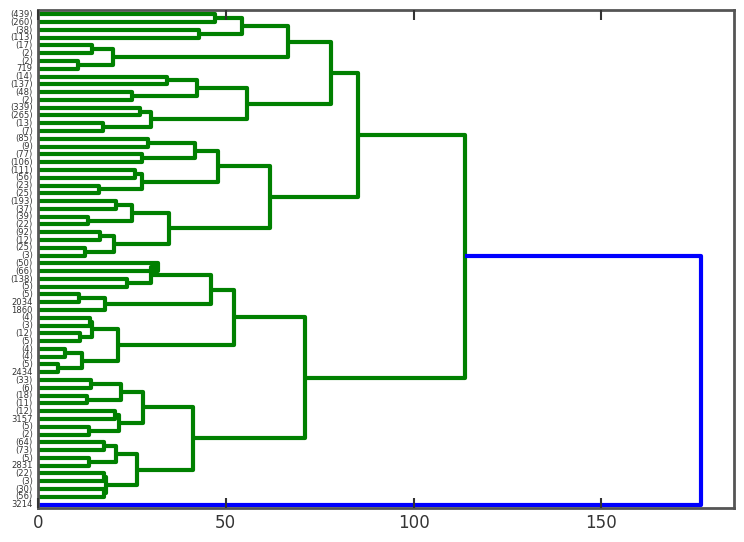

In [68]:
fig, ax = plt.subplots(1, figsize=(8,6))
d0 = hac.dendrogram(z_centroid, p=6, truncate_mode='level', 
                   orientation='right', ax=ax);

In [69]:
nclust = 20
part_centroid = hac.fcluster(z_centroid, 20, criterion='maxclust')
#part_single = hac.fcluster(z_single, nclust, 'maxclust')
#part_complete = hac.fcluster(z_complete, nclust, 'maxclust')

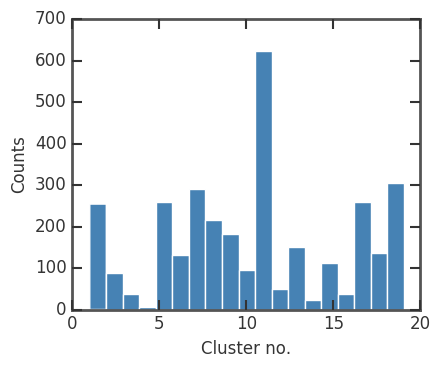

In [70]:
plt.figure(figsize=(4,3.5))
otpt = plt.hist(part_centroid, color='SteelBlue', bins=nclust);
plt.xlabel('Cluster no.'); plt.ylabel('Counts');

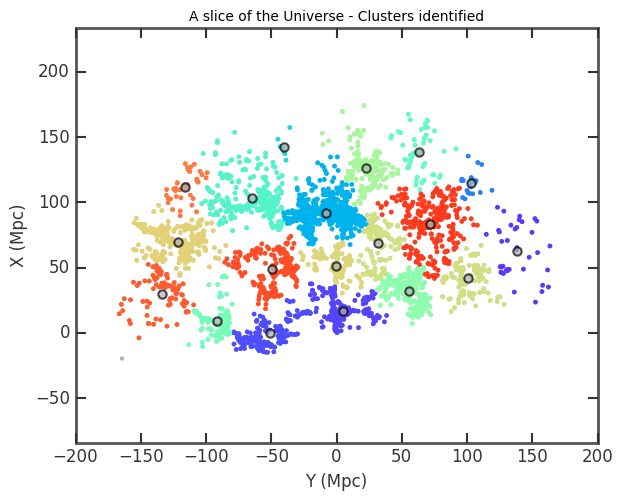

In [71]:
plt.figure(figsize=(6,5))
plt.subplot(111)
part = part_centroid
levels = np.arange(nclust)
#colors = plt.cm.viridis(np.random.rand(len(levels)))
colors = plt.cm.rainbow(np.random.rand(len(levels)))
for n, color in zip(levels, colors):
    plt.scatter(mycat['Y'][part==n], -1*mycat['X'][part==n], s=12, color=color, edgecolor='None')
    plt.plot(mycat['Y'][part==n].mean(), -1*mycat['X'][part==n].mean(), 
             'o', c='0.7', mec='k', ms=6, ls='None', mew=1.5, alpha=0.7)    
plt.xlabel('Y (Mpc)'); plt.ylabel('X (Mpc)')
plt.scatter(mycat['Y'], -1*mycat['X'], s=10, color='0.7', edgecolor='None',zorder=-1)
plt.title('A slice of the Universe - Clusters identified')
plt.axis('equal');